In [1]:
import pandas as pd
import numpy as np

In [2]:
X = np.array([49,69,89,99,109])
Y = np.array([124,95,71,45,18])

In [3]:
Xmat=np.array([[1,1,1,1,1], [49,69,89,99,109]]).T
Ymat = Y
Xmat

array([[  1,  49],
       [  1,  69],
       [  1,  89],
       [  1,  99],
       [  1, 109]])

In [4]:
np.dot(np.linalg.inv(np.dot(Xmat.T, Xmat)), np.dot(Xmat.T,Y))

array([211.27068966,  -1.69482759])

In [5]:
w = -1.69482759
b = 211.27068966

In [6]:
Yhat = b + np.dot(X,w)
Yhat

array([128.22413775,  94.32758595,  60.43103415,  43.48275825,
        26.53448235])

## Gradient Descent , Cost Function 

In [7]:
Ad = pd.read_csv('Advertising.csv')
Ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
X = Ad[['TV','Radio','Newspaper']]
Y = Ad['Sales']

In [9]:
Y = np.array((Y - Y.mean())/Y.std())
X = X.apply(lambda rec: (rec - rec.mean())/rec.std(), axis=0)
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [10]:
import random

def ini(dim):
    np.random.seed(seed=42)
    random.seed(42)
    b=random.random()
    w=np.random.rand(dim)
    return b,w

In [11]:
b,w=ini(3)
print('bias',b,'weights',w)

bias 0.6394267984578837 weights [0.37454012 0.95071431 0.73199394]


In [12]:
def predy(b, w, X):
    return b+np.dot(X, w)

In [13]:
b,w = ini(3)
Yhat = predy(b, w, X)
Yhat[0:10]

array([ 3.23149557,  1.70784873,  2.82476076,  2.75309026,  0.92448558,
        3.17136498,  0.62234399, -0.34935444, -2.313095  , -0.76802983])

In [14]:
import math
def gcost(Y, Yhat):
    Yresid = Y-Yhat
    return np.sum(np.dot(Yresid.T, Yresid))/len(Yresid)

In [15]:
b,w = ini(3)
Yhat = predy(b,w,X)
gcost(Y, Yhat)

1.5303100198505895

In [16]:
def update(X,Y,Yhat,b0,w0,learning_rate):
    db = (np.sum(Yhat - Y)*2)/len(Y)      # gradient of bias
    dw = (np.dot((Yhat-Y),X)*2)/len(Y)       # gadient of weights
    b1 = b0 - learning_rate*db            # update bias
    w1 = w0 - learning_rate*dw            # update beta
    return b1,w1                       # return new bias and beta values

In [17]:
b,w =ini(3)
print('After initialization - bias', b, 'weights:',w)
Yhat = predy(b,w,X)
b,w = update(X,Y,Yhat,b,w,0.01)
print('After first update bias',b,'weights', w)

After initialization - bias 0.6394267984578837 weights: [0.37454012 0.95071431 0.73199394]
After first update bias 0.6266382624887261 weights [0.38079093 0.9376953  0.71484883]


In [18]:
def run(X,Y,alpha = 0.01, num_iterations = 100):
    b,w = ini(X.shape[1])
    iter_num = 0
    gdi = pd.DataFrame(columns = ['iteration','cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Yhat = predy(b,w,X)
        this_cost = gcost(Y,Yhat)
        prev_b = b
        prev_w = w
        b, w = update(X, Y, Yhat, prev_b, prev_w, alpha)
        if(iter_num % 10 == 0):
            gdi.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1
        iter_num += 1
    print('Final estimate of b and w', b,w)
    return gdi,b,w



In [19]:
gdi1,b,w = run(X,Y,alpha = 0.01, num_iterations = 10000)

Final estimate of b and w 2.775466205076477e-16 [ 0.75306591  0.53648155 -0.00433069]


(0.0, 250.0)

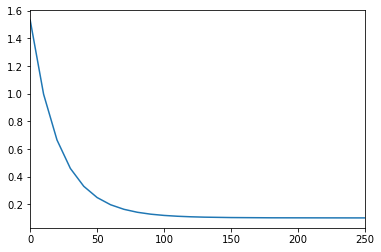

In [20]:
import matplotlib.pyplot as plt
plt.plot(gdi1['iteration'], gdi1['cost'])
plt.xlim(0,250)

In [21]:
# loer learning rate of 0.001
gdi1,b,w = run(X,Y,alpha = 0.001, num_iterations = 10000)

Final estimate of b and w 1.2918253342422793e-09 [ 0.75306591  0.53648113 -0.00433026]


(0.0, 2000.0)

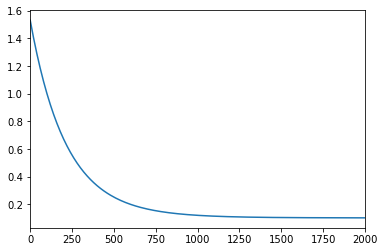

In [22]:
plt.plot(gdi1['iteration'], gdi1['cost'])
plt.xlim(0,2000)

### Scikit learn library for Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Ad[['TV','Radio','Newspaper']] ,Ad['Sales'],  test_size=0.3, random_state=42)

In [25]:
linreg = LinearRegression ()
linreg.fit(Xtrain, Ytrain)

LinearRegression()

In [26]:
linreg.intercept_

2.70894909251591

In [27]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [28]:
list(zip(Xtrain.columns, (linreg.coef_)))

[('TV', 0.0440592809574652),
 ('Radio', 0.19928749689893954),
 ('Newspaper', 0.006882452222275456)]

Sales = 2.708 + 0.044TV + 0.199 Radio + 0.006 Newspaper

In [29]:
ypred = linreg.predict(Xtest)


In [30]:
test_pred = pd.DataFrame({'actual': Ytest, 'predicted': np.round(ypred,2)})
test_pred[:10]

,actual,predicted
95,16.9,16.57
15,22.4,21.19
30,21.4,21.55
158,7.3,10.89
128,24.7,22.20
115,12.6,13.36
69,22.3,21.20
170,8.4,7.35
174,11.5,13.28
45,14.9,15.12


In [31]:
from sklearn import metrics

In [32]:
r2 = metrics.r2_score(Ytrain, linreg.predict(Xtrain))
print('R-squared: ',r2)

R-squared:  0.9055159502227753


In [33]:
mse = metrics.mean_squared_error(Ytest,ypred)

In [34]:
rmse = round(np.sqrt(mse),2)
print('RMSE: ', rmse)

RMSE:  1.95


### Validation Dataset

In [35]:
Ad = pd.read_csv('Advertising.csv')
X = Ad[['TV','Radio','Newspaper']]
Y = Ad['Sales']

In [36]:
Xtrain, Xother, Ytrain, Yother = train_test_split(Ad[['TV','Radio','Newspaper']] ,Ad['Sales'],  test_size=0.3, random_state=42)

In [37]:
Xeval, Xtest, Yeval, Ytest = train_test_split(Xother ,Yother,  test_size=0.5, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

# for one stdev change in X value, the Y stdev changes by beta

# Standardized Beta = Unstandardized Beta * (stdev X/ stdev Y)

In [40]:
Xtrain = scaler.fit_transform(Xtrain)

In [41]:
Xtest = scaler.transform(Xtest)

In [42]:
Xeval = scaler.transform(Xeval)

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(Xtrain, Ytrain)

LinearRegression()

In [45]:
pred = lm.predict(Xeval)

In [46]:
metrics.mean_squared_error(Yeval,pred)

2.54903856871742

### KFold Validation

In [47]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X ,Y,  test_size=0.3, random_state=101)

In [48]:
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(lm, Xtrain, Ytrain, scoring = 'neg_mean_squared_error', cv=5)

In [51]:
from sklearn.metrics import SCORERS

In [52]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [53]:
scores

array([-3.13932842, -1.6224631 , -5.37383747, -2.24224626, -4.34167085])

In [54]:
abs(scores.mean())

3.343909221204691

In [55]:
lm.coef_

array([3.68334078, 2.90625242, 0.14194772])

In [56]:
pred1 = lm.predict(Xtest)

In [57]:
metrics.mean_squared_error(Ytest,pred1)

2.5173949444405155

## Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lassomodel = Lasso(alpha = 0.1, max_iter = 5000)

In [60]:
lassomodel.fit(Xtrain, Ytrain)

Lasso(alpha=0.1, max_iter=5000)

In [61]:
lassomodel.coef_

array([3.67201171, 2.67007381, 0.        ])

In [62]:
predict = lassomodel.predict(Xtest)

In [63]:
metrics.mean_squared_error(Ytest,predict)

2.3873426420874737

### Lasso With Cross Validation

In [64]:
from sklearn.linear_model import LassoCV

In [65]:
lassocvmodel = LassoCV(eps = 0.001, alphas=[-1,0.01,10], cv=5, max_iter = 100000)

In [66]:
lassocvmodel.fit(Xtrain, Ytrain)

LassoCV(alphas=[-1, 0.01, 10], cv=5, max_iter=100000)

In [67]:
lassocvmodel.alpha_

0.01

In [68]:
predict = lassocvmodel.predict(Xtest)

In [69]:
metrics.mean_squared_error(Ytest,predict)

2.3066370693239673

In [70]:
lassocvmodel = LassoCV(eps = 0.0001, n_alphas=1000 , cv=5, max_iter = 100000)

In [71]:
lassocvmodel.fit(Xtrain, Ytrain)

LassoCV(cv=5, eps=0.0001, max_iter=100000, n_alphas=1000)

In [72]:
lassocvmodel.alpha_

0.09472651317300008

In [73]:
predict = lassocvmodel.predict(Xtest)

In [74]:
metrics.mean_squared_error(Ytest,predict)

2.381761060791874

### L2 Norm  Ridge

In [75]:
from sklearn.linear_model import Ridge

In [76]:
ridgemodel = Ridge(alpha = 3, max_iter = 1000)

In [77]:
ridgemodel.fit(Xtrain, Ytrain)

Ridge(alpha=3, max_iter=1000)

In [78]:
ridgemodel.coef_

array([3.68800558, 2.70440946, 0.02102826])

In [79]:
predict = ridgemodel.predict(Xtest)

In [80]:
metrics.mean_squared_error(Ytest,predict)

2.3656314101377873

## Ridge with CV

In [87]:
from sklearn.linear_model import RidgeCV

In [88]:
ridgemodelcv = RidgeCV(alphas=(0.1,1,10), scoring = 'neg_mean_squared_error' )

In [89]:
ridgemodelcv.fit(Xtrain, Ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_squared_error')

In [90]:
ridgemodelcv.alpha_

0.1

In [91]:
ridgemodelcv.coef_

array([ 3.76333559,  2.76339947, -0.00593674])

In [92]:
predict = ridgemodelcv.predict(Xtest)

In [93]:
metrics.mean_squared_error(Ytest,predict)

2.300652700355757

## Elastic Net

In [94]:
from sklearn.linear_model import ElasticNet

In [95]:
enet = ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter = 10000)

In [96]:
enet.fit(Xtrain, Ytrain)

ElasticNet(alpha=0.001, max_iter=10000)

In [97]:
prediction = enet.predict(Xtest)

In [98]:
metrics.mean_squared_error(Ytest,prediction)

2.300511846625849

In [99]:
#Elastic Net with CV

In [100]:
from sklearn.linear_model import ElasticNetCV

In [109]:
enetcv = ElasticNetCV(l1_ratio = [.1,.2, .3, .4,.5,.7,.9,.99,1],
                     eps = 0.001, n_alphas = 100, max_iter = 100000, cv = 5)

In [110]:
enetcv.fit(Xtrain, Ytrain)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 0.99, 1],
             max_iter=100000)

In [111]:
enetcv.l1_ratio_

1.0

In [112]:
enetcv.alpha_

0.0915650077992293

In [113]:
predict = enetcv.predict(Xtest)

In [114]:
metrics.mean_squared_error(Ytest,predict)

2.3784657395975066

## Grid Search CV

In [115]:
base = ElasticNet()

In [116]:
param = {'alpha': [.001, .01, 1, 5, 10, 50], 'l1_ratio': [.1, .5, .7, .95, .99, 1] }

In [117]:
from sklearn.model_selection import GridSearchCV

In [120]:
grid = GridSearchCV(estimator=base, param_grid=param, scoring='neg_mean_squared_error', cv=5, verbose = 1)

In [121]:
grid.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 50],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [122]:
grid.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=1)

In [128]:
# grid.cv_results_
# pd.DataFrame(grid.cv_results_)

In [129]:
predict = grid.predict(Xtest)

In [130]:
metrics.mean_squared_error(Ytest,predict)

2.3066370693239673